In [134]:
import numpy as np

In [201]:
X1 = np.random.randn(1000).reshape(1000, 1)
X2 = np.random.randn(1000).reshape(1000, 1)
X3 = np.random.randn(1000).reshape(1000, 1)
#X = np.c_[X1, X2, X3, np.ones((1000, 1))]
X = np.c_[X1, X2, X3]

In [202]:
Y = 5 * X1 + 3 * X2 + 1.5 * X3 + 6

In [203]:
W = np.zeros(4).reshape(4, 1)

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [404]:
def loss(y_true, y_pred):
    return 1 / (2*len(y_true)) * np.sum(np.sum((y_true-y_pred)**2))

In [422]:
def Gradient_Descent(W, b, Y, X, num_iterations = 1000, alpha = 0.001):
    m = len(Y)
    costs = []
    for i in range(num_iterations):
        y_hat = X.dot(W) + b
        Dweight = 1/m *  np.sum(X * (y_hat - Y))
        Dbias = 1/m * np.sum(y_hat - Y)
        W = W - alpha * Dweight
        b = b - alpha * Dbias
        costs.append(loss(y_pred=y_hat, y_true=Y))
    return W, b, costs

In [406]:
W = np.random.rand(3, 1)
b = np.random.rand(1)

In [407]:
W, b = Gradient_Descent(W, b, y_train, X_train)

In [408]:
W, b

(array([[3.26371323],
        [3.19606867],
        [2.69546226]]),
 array([4.03607337]))

In [409]:
from sklearn.metrics import mean_squared_error

In [410]:
mean_squared_error(y_true=y_test, y_pred=X_test.dot(W) + b)

8.061179767403804

In [411]:
import pandas as pd

In [412]:
df = pd.read_csv('train.csv')

In [413]:
df.dropna(inplace=True, axis=1)
df = df.select_dtypes('int64')
Y = df['SalePrice']
df.drop(['SalePrice'], axis=1, inplace=True)
df.drop(['Id'], axis = 1, inplace = True)
X = df.to_numpy()
Y = Y.to_numpy().reshape(1460, 1)

In [414]:
W = np.random.randn(33).reshape(33, 1)
b = np.random.randn(1)

In [415]:
W, b = Gradient_Descent(W, b, Y = Y, X = X)

/tmp/ipykernel_15012/4229274106.py:2: RuntimeWarning: overflow encountered in square
  return 1 / (2*len(y_true)) * np.sum(np.sum((y_true-y_pred)**2))
/tmp/ipykernel_15012/786125493.py:6: RuntimeWarning: overflow encountered in multiply
  Dweight = 1/m *  np.sum(X * (y_hat - Y))
/home/youseef/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [416]:
from sklearn.preprocessing import StandardScaler

In [417]:
scaler = StandardScaler()
scaler2 = StandardScaler()

In [418]:
X = scaler.fit_transform(X)
Y = scaler2.fit_transform(Y)

In [419]:
W2 = np.random.randn(33, 1)
b2 = np.random.randn(1)

In [423]:
W2, b2, costs = Gradient_Descent(W2, b2, Y, X, num_iterations=10000)

In [424]:
mean_squared_error(y_pred=scaler2.transform(X.dot(W2) + b2), y_true=scaler2.transform(Y))

4.809309742370345e-09

In [425]:
import matplotlib.pyplot as plt

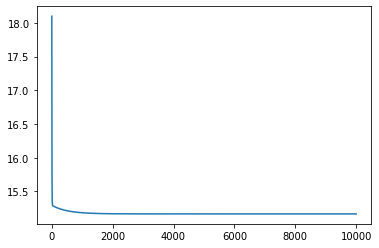

In [426]:
plt.plot(costs)